In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing
df=fetch_california_housing()

In [3]:
df.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
from sklearn.model_selection import train_test_split as tts
x_train_full,x_test,y_train_full,y_test=tts(df.data,df.target,test_size=0.23)
x_train,x_valid,y_train,y_valid=tts(x_train_full,y_train_full,random_state=42)


In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_valid=sc.transform(x_valid)
x_test=sc.transform(x_test)

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
x_train.shape,x_valid.shape,x_test.shape

((11919, 8), (3973, 8), (4748, 8))

In [8]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(30,input_shape=[8]))
model.add(keras.layers.Dense(30,activation='relu'))
model.add(keras.layers.Dense(1))

In [9]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(lr=1e-3),metrics=['mae'])

C:\Users\kores\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [10]:
model_history=model.fit(x_train,y_train,epochs=60,validation_data=(x_valid,y_valid))

Epoch 1/60
373/373 [==============================] - 1s 2ms/step - loss: 1.5804 - mae: 0.9011 - val_loss: 0.9050 - val_mae: 0.6112
Epoch 2/60
373/373 [==============================] - 1s 1ms/step - loss: 0.6588 - mae: 0.5799 - val_loss: 0.6656 - val_mae: 0.5679
Epoch 3/60
373/373 [==============================] - 1s 1ms/step - loss: 0.5822 - mae: 0.5478 - val_loss: 0.5873 - val_mae: 0.5436
Epoch 4/60
373/373 [==============================] - 1s 1ms/step - loss: 0.5436 - mae: 0.5287 - val_loss: 0.5440 - val_mae: 0.5311
Epoch 5/60
373/373 [==============================] - 1s 1ms/step - loss: 0.5172 - mae: 0.5165 - val_loss: 0.5260 - val_mae: 0.5163
Epoch 6/60
373/373 [==============================] - 1s 2ms/step - loss: 0.4981 - mae: 0.5062 - val_loss: 0.5026 - val_mae: 0.5111
Epoch 7/60
373/373 [==============================] - 1s 1ms/step - loss: 0.4826 - mae: 0.4981 - val_loss: 0.5092 - val_mae: 0.5044
Epoch 8/60
373/373 [==============================] - 1s 1ms/step - loss: 0.

In [11]:
eval=model.evaluate(x_test,y_test)

149/149 [==============================] - 0s 1ms/step - loss: 0.3850 - mae: 0.4397


In [12]:
x_new=x_test[:3]

In [13]:
model_history.history

{'loss': [1.5804494619369507,
  0.6588072776794434,
  0.5821524262428284,
  0.5436019897460938,
  0.5171573758125305,
  0.49811071157455444,
  0.48257341980934143,
  0.4715211093425751,
  0.46243834495544434,
  0.4527651071548462,
  0.44729331135749817,
  0.4411354064941406,
  0.4354870617389679,
  0.430151104927063,
  0.4270840585231781,
  0.4222702085971832,
  0.41985082626342773,
  0.4153781533241272,
  0.41290444135665894,
  0.40918922424316406,
  0.4079778790473938,
  0.40526580810546875,
  0.40360453724861145,
  0.4004191756248474,
  0.3983159065246582,
  0.3954768478870392,
  0.3936445713043213,
  0.39194923639297485,
  0.39014336466789246,
  0.38866227865219116,
  0.3871917128562927,
  0.3857245445251465,
  0.38433465361595154,
  0.3828016519546509,
  0.38172224164009094,
  0.38051456212997437,
  0.37900540232658386,
  0.3779391646385193,
  0.37701427936553955,
  0.37566936016082764,
  0.3745884597301483,
  0.3735804557800293,
  0.37250688672065735,
  0.37156423926353455,
  0.3

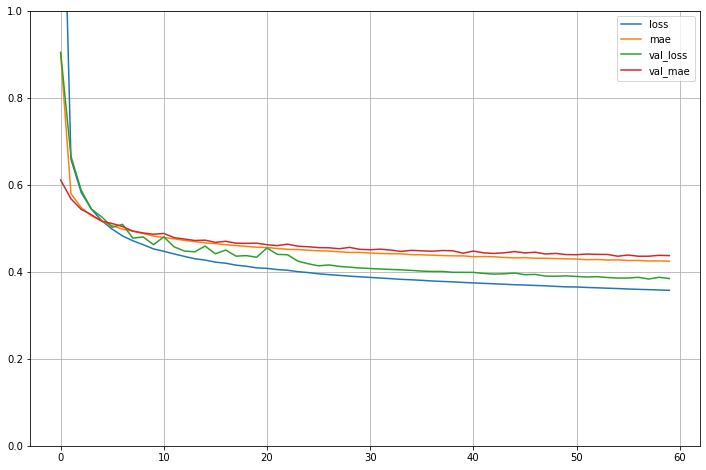

In [14]:
pd.DataFrame(model_history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
x_new=x_test[:6]
y_pred=model.predict(x_new)


1/1 [==============================] - 0s 83ms/step


In [16]:
y_pred

array([[3.9735758 ],
       [4.569865  ],
       [0.57304543],
       [1.2638435 ],
       [1.7461662 ],
       [2.6220565 ]], dtype=float32)

# functional API

In [17]:
del model

In [18]:
keras.backend.clear_session()

In [19]:
input=keras.layers.Input(shape=x_train.shape[1:])
hid1=keras.layers.Dense(30,activation='relu')(input)
hid2=keras.layers.Dense(30,activation='relu')(hid1)
concat=keras.layers.concatenate([input,hid2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input],outputs=[output])

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

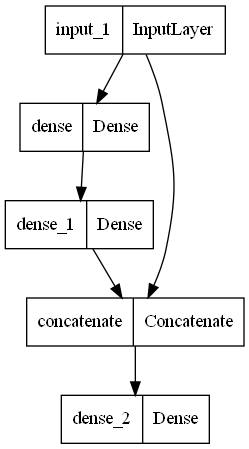

In [21]:
import pydot 
keras.utils.plot_model(model)

# call backs and restoring the model

In [22]:
model.save("new_model.h5")


In [23]:
pwd

'C:\\Users\\kores'

In [24]:
del model

In [25]:
keras.backend.clear_session()

In [26]:
model=keras.models.load_model("new_model.h5")

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [28]:
y_pred=model.predict(x_new)

1/1 [==============================] - 0s 62ms/step


In [29]:
y_pred

array([[ 0.6464248 ],
       [ 0.7791245 ],
       [-0.5563334 ],
       [ 0.09806155],
       [-0.6125435 ],
       [-0.38933587]], dtype=float32)

# using callbacks

In [42]:
del model

In [43]:
keras.backend.clear_session()

In [44]:
np.random.seed(42)
tf.random.set_seed(42)

In [46]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(30,input_shape=[8]))
model.add(keras.layers.Dense(30,activation='relu'))
model.add(keras.layers.Dense(1))

In [49]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [50]:
check=keras.callbacks.ModelCheckpoint('Model-{epoch:02d}.h5')

In [56]:
history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid),callbacks=[check])

Epoch 1/30
373/373 [==============================] - 1s 2ms/step - loss: 1.5804 - val_loss: 0.9050
Epoch 2/30
373/373 [==============================] - 1s 1ms/step - loss: 0.6588 - val_loss: 0.6656
Epoch 3/30
373/373 [==============================] - 1s 2ms/step - loss: 0.5822 - val_loss: 0.5873
Epoch 4/30
373/373 [==============================] - 1s 2ms/step - loss: 0.5436 - val_loss: 0.5440
Epoch 5/30
373/373 [==============================] - 1s 1ms/step - loss: 0.5172 - val_loss: 0.5260
Epoch 6/30
373/373 [==============================] - 1s 2ms/step - loss: 0.4981 - val_loss: 0.5026
Epoch 7/30
373/373 [==============================] - 1s 1ms/step - loss: 0.4826 - val_loss: 0.5092
Epoch 8/30
373/373 [==============================] - 1s 1ms/step - loss: 0.4715 - val_loss: 0.4773
Epoch 9/30
373/373 [==============================] - 1s 1ms/step - loss: 0.4624 - val_loss: 0.4803
Epoch 10/30
373/373 [==============================] - 1s 1ms/step - loss: 0.4528 - val_loss: 0.4624

In [57]:
del model

In [58]:
mse=keras.backend.clear_session()

In [59]:
m=keras.models.load_model("Model-30.h5")

In [60]:
mse=m.evaluate(x_test,y_test)

149/149 [==============================] - 0s 996us/step - loss: 0.4187


In [61]:
mse

0.4186895191669464

# best model

In [64]:
keras.backend.clear_session()

In [65]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

In [69]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=(1e-3)))

In [70]:
check=keras.callbacks.ModelCheckpoint("best_model.h5",save_best_only=True)

In [72]:
history=model.fit(x_train,y_train,epochs=300,validation_data=(x_valid,y_valid),callbacks=[check])

Epoch 1/300
373/373 [==============================] - 1s 2ms/step - loss: 1.4499 - val_loss: 0.8350
Epoch 2/300
373/373 [==============================] - 1s 2ms/step - loss: 0.7484 - val_loss: 0.7104
Epoch 3/300
373/373 [==============================] - 1s 1ms/step - loss: 0.6570 - val_loss: 0.6572
Epoch 4/300
373/373 [==============================] - 1s 2ms/step - loss: 0.6047 - val_loss: 0.6011
Epoch 5/300
373/373 [==============================] - 1s 1ms/step - loss: 0.5678 - val_loss: 0.5743
Epoch 6/300
373/373 [==============================] - 1s 1ms/step - loss: 0.5378 - val_loss: 0.5451
Epoch 7/300
373/373 [==============================] - 1s 1ms/step - loss: 0.5146 - val_loss: 0.5303
Epoch 8/300
373/373 [==============================] - 1s 1ms/step - loss: 0.4955 - val_loss: 0.5065
Epoch 9/300
373/373 [==============================] - 1s 2ms/step - loss: 0.4791 - val_loss: 0.4920
Epoch 10/300
373/373 [==============================] - 1s 2ms/step - loss: 0.4654 - val_lo